# 2022 NZMSA Data Science Submission.

In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt


%matplotlib inline

# Exploratory Data Analysis.

In [2]:
dataset = pd.read_csv("weather-data.csv",parse_dates=True)
dataset.head() # Show the first five results.

,station,valid,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
0,NZAA,2015-01-01 00:00,21.0,11.0,52.77,15.0,NaN,NaN
1,NZAA,2015-01-01 00:30,21.0,10.0,49.37,16.0,NaN,NaN
2,NZAA,2015-01-01 01:00,21.0,12.0,56.38,16.0,NaN,NaN
3,NZAA,2015-01-01 01:30,21.0,13.0,60.21,16.0,NaN,NaN
4,NZAA,2015-01-01 02:00,21.0,12.0,56.38,16.0,NaN,NaN


In [3]:
#Describe the data using Mean, Std, and the 25th and 75th percentiles
dataset.describe()

,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
count,103678.000000,103678.000000,103593.000000,103704.000000,1203.000000,0.0
mean,15.811503,12.115772,79.782307,8.919029,30.962594,NaN
std,4.235197,3.738005,12.562199,5.348379,6.319510,NaN
min,2.000000,-2.000000,29.230000,0.000000,13.000000,NaN
25%,13.000000,9.000000,71.450000,5.000000,27.000000,NaN
50%,16.000000,12.000000,81.990000,8.000000,31.000000,NaN
75%,19.000000,15.000000,88.180000,12.000000,35.000000,NaN
max,29.000000,23.000000,100.000000,42.000000,56.000000,NaN


Here is a visual representation of the data spread

tmpc                 AxesSubplot(0.125,0.536818;0.227941x0.343182)
dwpc              AxesSubplot(0.398529,0.536818;0.227941x0.343182)
relh              AxesSubplot(0.672059,0.536818;0.227941x0.343182)
sknt                    AxesSubplot(0.125,0.125;0.227941x0.343182)
gust                 AxesSubplot(0.398529,0.125;0.227941x0.343182)
peak_wind_drct       AxesSubplot(0.672059,0.125;0.227941x0.343182)
dtype: object

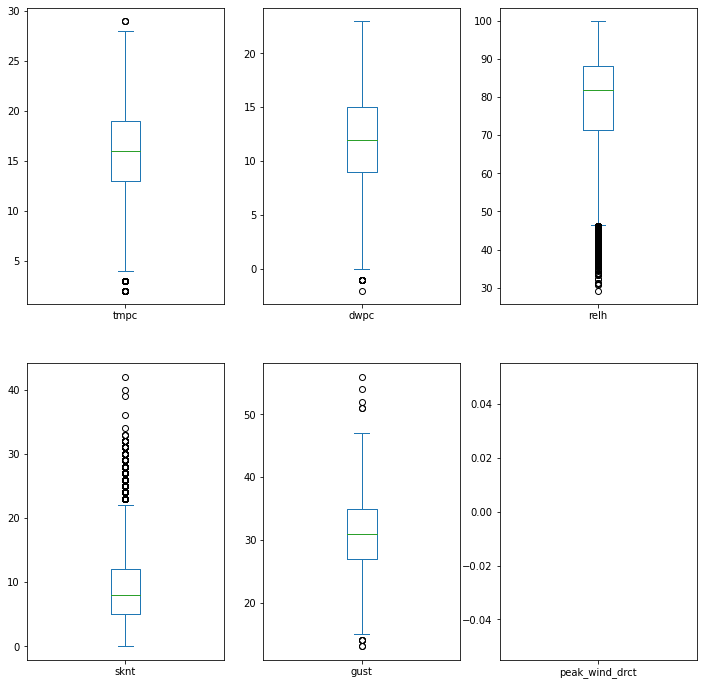

In [4]:
dataset.plot(figsize=(12,12),kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False)

sknt has the highest count number, followed closely by tmpc and dwpc which is then followed closely by relh, and then gust. peak_wind_drct has a count of zero and therefore no data.

In [5]:
dataset.info()
dataset.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0    station        103713 non-null  object 
 1   valid           103713 non-null  object 
 2   tmpc            103678 non-null  float64
 3   dwpc            103678 non-null  float64
 4   relh            103593 non-null  float64
 5   sknt            103704 non-null  float64
 6   gust            1203 non-null    float64
 7   peak_wind_drct  0 non-null       float64
dtypes: float64(6), object(2)
memory usage: 6.3+ MB


0

This confirms that peak_wind_drct is completely null. It also shows that all of the data columns contain null values in different rows.
The valid column is also treated as an object but needs to be a dateTime.
I am also checking for any duplicates within the data

In [6]:
dataset['valid'] = pd.to_datetime(dataset['valid'])
dataset.index = dataset['valid']
#dataset.reset_index()
#dataset.index.to_pydatetime()
#del dataset['valid']
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 103713 entries, 2015-01-01 00:00:00 to 2020-12-30 23:30:00
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0    station        103713 non-null  object        
 1   valid           103713 non-null  datetime64[ns]
 2   tmpc            103678 non-null  float64       
 3   dwpc            103678 non-null  float64       
 4   relh            103593 non-null  float64       
 5   sknt            103704 non-null  float64       
 6   gust            1203 non-null    float64       
 7   peak_wind_drct  0 non-null       float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 7.1+ MB


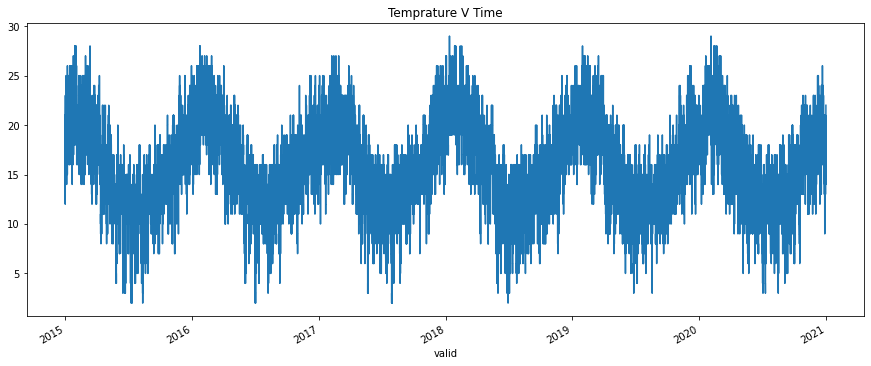

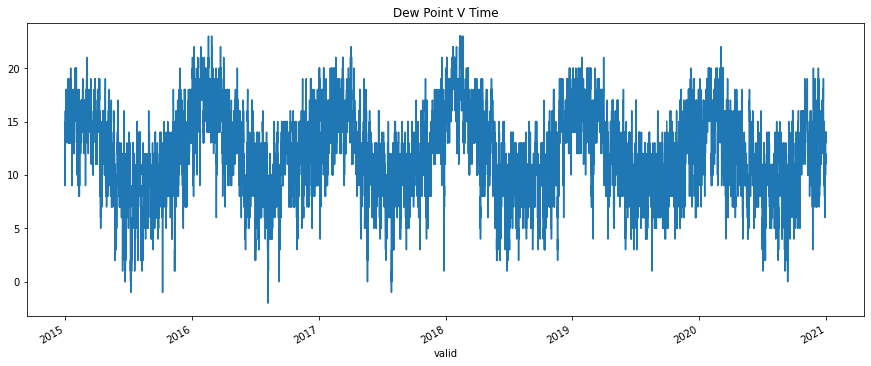

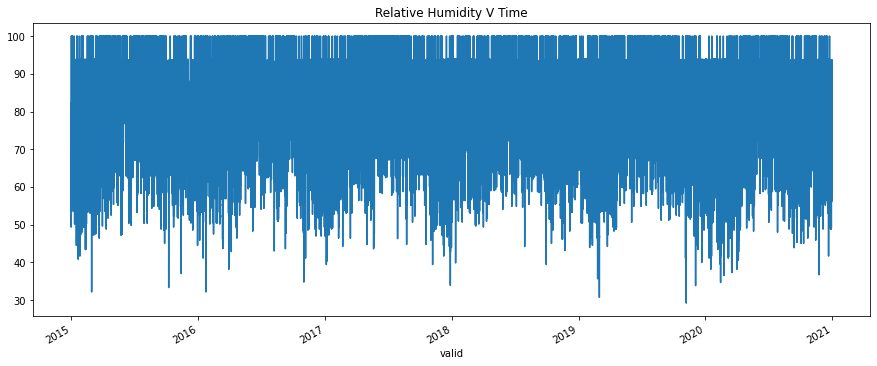

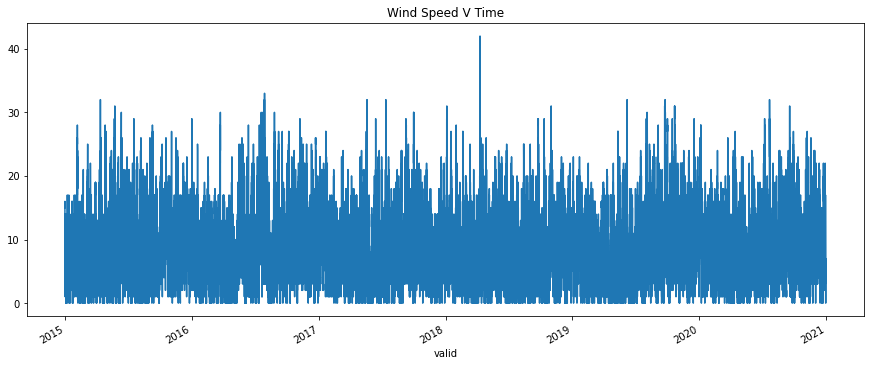

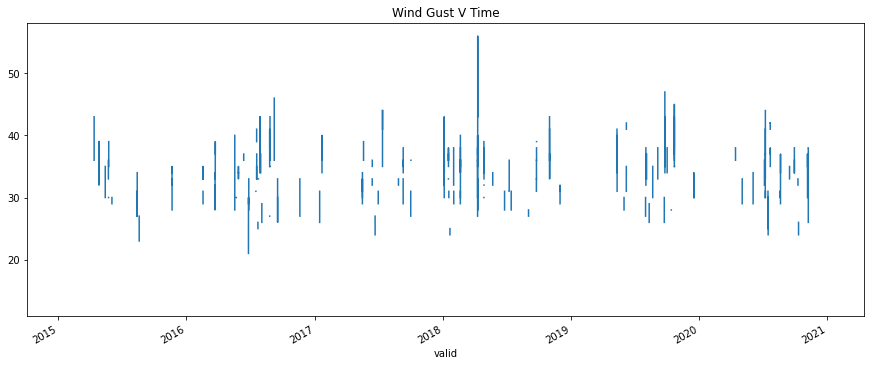

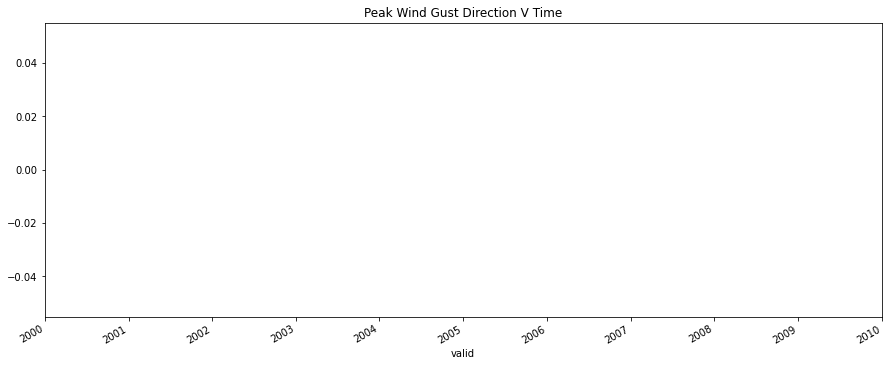

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 103713 entries, 2015-01-01 00:00:00 to 2020-12-30 23:30:00
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0    station        103713 non-null  object        
 1   valid           103713 non-null  datetime64[ns]
 2   tmpc            103678 non-null  float64       
 3   dwpc            103678 non-null  float64       
 4   relh            103593 non-null  float64       
 5   sknt            103704 non-null  float64       
 6   gust            1203 non-null    float64       
 7   peak_wind_drct  0 non-null       float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 7.1+ MB


In [7]:
dataset["tmpc"].plot(figsize=(15, 6))
plt.title("Temprature V Time")
plt.show()
dataset["dwpc"].plot(figsize=(15, 6))
plt.title("Dew Point V Time")
plt.show()
dataset["relh"].plot(figsize=(15, 6))
plt.title("Relative Humidity V Time")
plt.show()
dataset["sknt"].plot(figsize=(15, 6))
plt.title("Wind Speed V Time")
plt.show()
dataset["gust"].plot(figsize=(15, 6))
plt.title("Wind Gust V Time")
plt.show()
dataset["peak_wind_drct"].plot(figsize=(15, 6))
plt.title("Peak Wind Gust Direction V Time")
plt.show()
dataset.info()

Within the above graphs we can see a very strong corralation between the date/time and numerous columns, such as temprature, dew point, with less prominant corralation with Wind Speed and Relative Humidity as it cycles through the seasons of the year.   
This will be usefull for prediciting the temprature and dew point for future dates.

Below is a correlation heatmap of the different columns.


<AxesSubplot:>

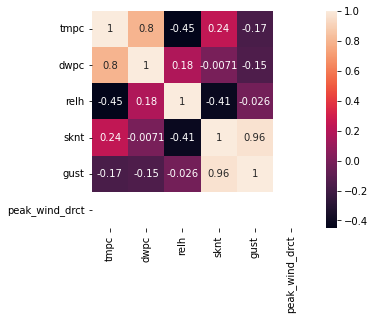

In [8]:

sns.heatmap(dataset.corr(), annot=True, square=True)

Correlation is seen the closer the values are to 1 and -1.   
There are multiple observed correlations with tmpc and dwpc & relh.  
There are also correlations with gust and sknt, and between sknt and relh.  
There are two strong correlations, being between tmpc & dwpc and sknt & gust.  
There are moderate correlations with tmpc & relh and sknt & relh.  

C:\Users\fakec\AppData\Local\Temp\ipykernel_18572\2159406809.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


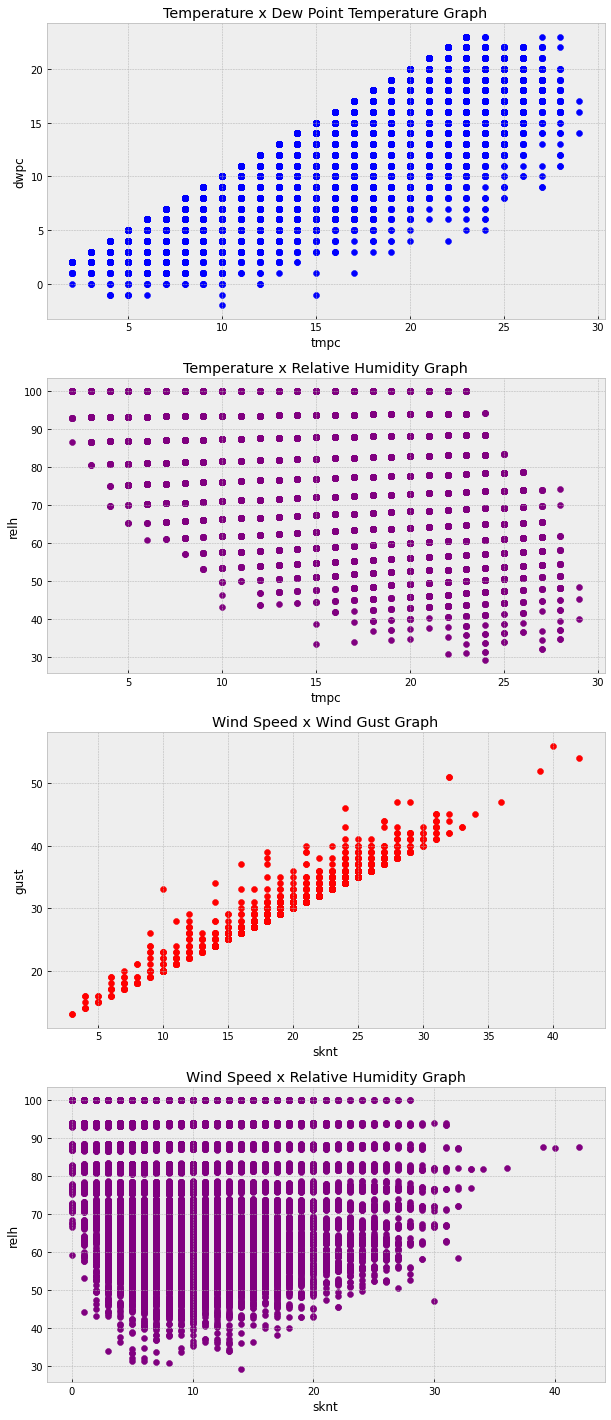

In [9]:
plt.style.use("bmh")
figure, (axis1, axis2, axis3, axis4) = plt.subplots(nrows=4, ncols=1,squeeze=True)

axis1.scatter(dataset["tmpc"], dataset["dwpc"], color="blue",)
axis1.set_title("Temperature x Dew Point Temperature Graph")
axis1.set_xlabel("tmpc")
axis1.set_ylabel("dwpc")

axis2.scatter(dataset["tmpc"], dataset["relh"], color="purple")
axis2.set_title("Temperature x Relative Humidity Graph")
axis2.set_xlabel("tmpc")
axis2.set_ylabel("relh")

axis3.scatter(dataset["sknt"], dataset["gust"], color="red")
axis3.set_title("Wind Speed x Wind Gust Graph")
axis3.set_xlabel("sknt")
axis3.set_ylabel("gust")

axis4.scatter(dataset["sknt"], dataset["relh"], color="purple")
axis4.set_title("Wind Speed x Relative Humidity Graph")
axis4.set_xlabel("sknt")
axis4.set_ylabel("relh")


figure.set_size_inches(10,25)
figure.show()

# Data Processing

The First Thing we are going to do is drop the Wind gust and wind gust direction columns as there are many null values within these columns.
We are also going to delete the station column as it is the same value for the entire dataset

In [10]:
del dataset['gust']
del dataset['peak_wind_drct']
del dataset[' station']


Then I am going to drop the rows that contain null values in the remaining dataset

In [11]:
dataset.info()
dataset = dataset.dropna()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 103713 entries, 2015-01-01 00:00:00 to 2020-12-30 23:30:00
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   valid   103713 non-null  datetime64[ns]
 1   tmpc    103678 non-null  float64       
 2   dwpc    103678 non-null  float64       
 3   relh    103593 non-null  float64       
 4   sknt    103704 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 4.7 MB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 103584 entries, 2015-01-01 00:00:00 to 2020-12-30 23:30:00
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   valid   103584 non-null  datetime64[ns]
 1   tmpc    103584 non-null  float64       
 2   dwpc    103584 non-null  float64       
 3   relh    103584 non-null  float64       
 4   sknt    103584 non-null  float64       
dtypes: datetime64[ns](

Now all the datset only has complete rows, which is going to bge usefull for training our model.  
Now we are going to split the model into ita training and testing datasets.

In [12]:
import matplotlib.dates as dt
#dataset.index.to_pydatetime()
#dataset['valid'] = pd.to_numeric(dataset['valid'])


As this is a time series problem, we need to divide the training data set by time periods.

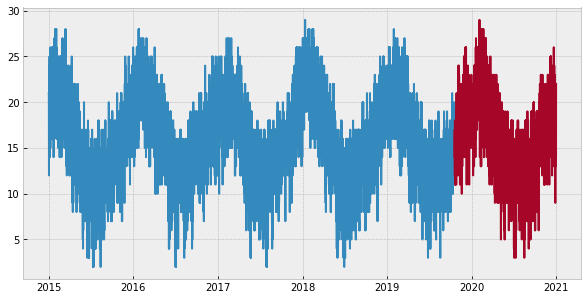

In [38]:
X = dataset['valid']
y = dataset['tmpc']
min_date = dataset.valid.min()
max_date = dataset.valid.max()
train_percent = .80
time_between = max_date - min_date
train_cutoff = min_date + train_percent*time_between
train_ds = dataset[dataset.valid <= train_cutoff]
test_ds = dataset[dataset.valid > train_cutoff]

y_train = train_ds['tmpc']
y_test = test_ds['tmpc']
X_train = train_ds[['valid']]
X_test = test_ds[['valid']]
plt.plot(y_train)
plt.plot(y_test)

Now the first roughly 4 years will be treated as the training data and the last year will be the testing data

In [39]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 82596 entries, 2015-01-01 00:00:00 to 2019-10-19 18:30:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   valid   82596 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.3 MB


In [15]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20988 entries, 2019-10-19 19:00:00 to 2020-12-30 23:30:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   valid   20988 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 327.9 KB


In [16]:
y_train.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 82596 entries, 2015-01-01 00:00:00 to 2019-10-19 18:30:00
Series name: tmpc
Non-Null Count  Dtype  
--------------  -----  
82596 non-null  float64
dtypes: float64(1)
memory usage: 1.3 MB


In [17]:
y_test.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 20988 entries, 2019-10-19 19:00:00 to 2020-12-30 23:30:00
Series name: tmpc
Non-Null Count  Dtype  
--------------  -----  
20988 non-null  float64
dtypes: float64(1)
memory usage: 327.9 KB


Now the model is ready to Train

# Data Modelling

In [18]:
# An exhaustive list of models can be found in sci-kit learn in this link: https://scikit-learn.org/stable/supervised_learning.html
# The url takes you to supervised learning which is what you will be dealing with for this phase.

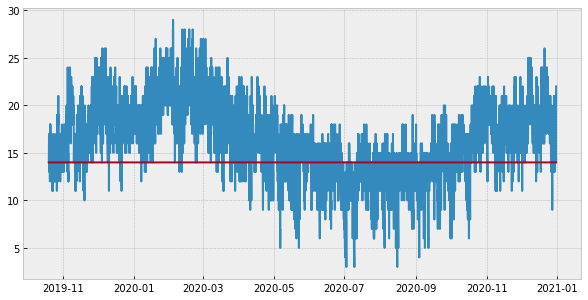

In [40]:
from sklearn.tree import DecisionTreeRegressor
import numpy

tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
y1 = tree_model.predict(X_test)
plt.plot(X_test,y_test)
plt.plot(X_test,y1)


This result was not what I initially expected, as I expected alot of variation between both the days and the seasons.   
Due to this, I will be training and testing an assortment of other models to check if this is only happening within the Decision Tree Regressor.

In [47]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
model = Pipeline([('poly', PolynomialFeatures(degree=2)),
        ('linear', LinearRegression(fit_intercept=False))])
model.fit(X_train, y_train)
ypred = model.predict(X_test)


from sklearn.ensemble import RandomForestRegressor
model2=RandomForestRegressor(n_estimators=10, max_features=2, max_leaf_nodes=5,random_state=42)
model2.fit(X_train, y_train)
ypred2 = model2.predict(X_test)

model3 = LinearRegression()
model3.fit(X_train, y_train)
XnewTest = pd.to_numeric(X_test.valid).array.reshape(-1,1)
ypred3 = model3.predict(XnewTest)



c:\Users\fakec\Desktop\MSA PHASE 2\DataScience\datascience\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


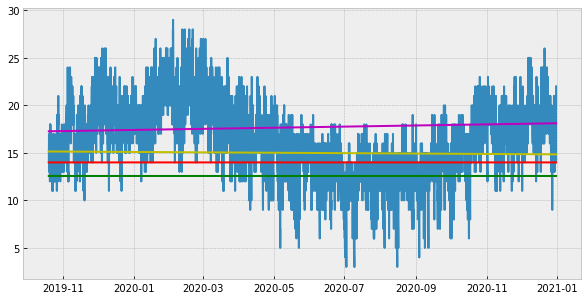

In [48]:
plt.plot(X_test,y_test)
plt.plot(X_test,ypred,'m')
plt.plot(X_test,ypred2,'g')
plt.plot(X_test,ypred3,'y')
plt.plot(X_test,y1,'r')

Even after utilizing different models to train and test the dataset, we are still observing the same phenomena in all of them.  
There is a small difference with the polynomial model, which I initially thought would perform the best as the initial dataset seemed to follow a sin like curve.
Due to this, that will be the model we will use to predict the tempratures next month


Here is the dataset for the next month

c:\Users\fakec\Desktop\MSA PHASE 2\DataScience\datascience\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


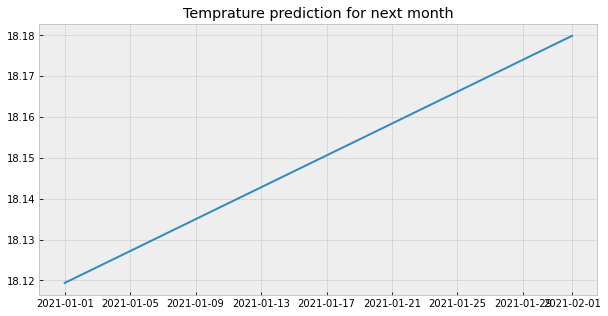

In [49]:
nextMonth = pd.date_range(start="2021-01-01T00:00:00.000Z",end="2021-02-01T00:00:00.000Z", freq="0.5H")
nextMonth = nextMonth.array.reshape(-1, 1)
pred = model.predict(nextMonth)
plt.plot(nextMonth,pred)
plt.title("Temprature prediction for next month")
plt.rcParams["figure.figsize"] = (10,5)


The Predicted Model indicates that there will be a temprature of 18.12 Degrees Celcious which gradually rises to 18.18C throuhgout the entire month. Although it is missing alot of the daily variation I would expect.

# Conclusion
After some initial exploratory data analysis, there were multiple things noticed within the dataset. Some Minor things were that some of the columns presented high correlation values with one another. This could have led to a model that depending on the value of one column, could predict another, such as tmpc and dwpc. However as the goal was to establish predictions for the next month, a time series was necessary. A very major thing that was noticed was that the tpmc column followed a cyclical path throughout the year, with it following a similiar path in the next. This makes sense as tempratures would be higher in summer and lower in winters. This led to the decision to create a model to track the tempratures throughout the years and form a model that could predict the tempratures of the next month.

The Data was processed with the intention of using it to predict the next months temprature, and as such the data cleaned from null values and superfluous values.

Multiple models were trained and tested, to try find the best performing model, however this was when the anomaly first occured.

The models do not seem to perform in an expected manner, and I am inclined to believe that it is returning to me some sort of average value instead of the individual fluctions in temprature that I would expect. I am not sure why this is occuring and inspite of my efforts to correct this, I am unable to prevent it from occuring in every model that I tested.

The final model I chose was chosen as it provided the most reasonable results, as it would be very unusual for an entire month to have the exact same temprature occur throughout.

The prediction data set is also segmented in a frequency of 0.5 hours, as to match the frequency of the data we were provided. In spite of this, the daily fluctuations are not present, which proposes a severe limitation to the accuracy and effectiveness of both the model and the values it is able to predict.

What the model does seem to predict is that there is an average temprature between 18.12C and 18.18C throughout the month, which is within the realm of possiblity as it is a summer month. It also indicates the temprature slighlty rising, which could also occur as as it is in the summer season.

The model could be somewhat usefull in determining the average daily temp, however this could have been achieved in a more suitable manner if this averaging was done excplicitly in the dataset where the daily average could be calculated and substituted into a new column for each day, and the 'valid' column could have been made to only include the date. this would have dramatically reduced the number of data points and variations in the temprature, which in theory could have led to a smoother solution.  This would in theory provide a more accurate model and would be reccomended in place of using this model.
